(39, 2)
          time        msd
0          2.0   0.000038
1          6.0   0.000334
2         14.0   0.001697
3         30.0   0.006065
4         62.0   0.016599
5        126.0   0.031961
6        254.0   0.046133
7        510.0   0.060072
8       1022.0   0.073863
9       2046.0   0.091613
10      4094.0   0.122659
11      8190.0   0.174532
12     16382.0   0.264738
13     32766.0   0.412191
14     65534.0   0.649476
15    131070.0   1.021290
16    262142.0   1.565191
17    524286.0   2.364092
18   1048574.0   3.565303
19   2097150.0   5.376874
20   2097153.0   5.368417
21   4194306.0   8.245655
22   6291459.0  10.528688
23   8388612.0  12.559342
24  10485765.0  14.558266
25  12582918.0  16.403335
26  14680071.0  18.145643
27  16777224.0  19.883641
28  18874377.0  21.573373
29  20971530.0  23.182040
30  23068683.0  24.674865
31  25165836.0  26.140303
32  27262989.0  27.473892
33  29360142.0  28.829313
34  31457295.0  30.143334
35  33554448.0  31.159773
36  35651601.0  31.915179
37  

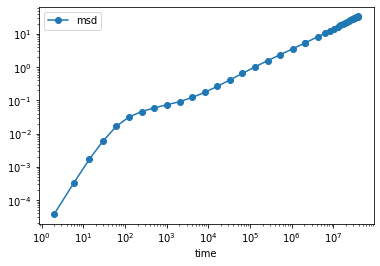

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


msd = np.load("msd.npy")
df = pd.DataFrame(msd)
df.columns=["time", "msd"]
print(df.shape)
#df.plot(x='time', y='msd', logy=True, logx=True, marker="o")
print(df)
fig, ax =  plt.subplots()
ax = df.plot(x='time', y='msd', ax=ax, marker="o")
ax.set_xscale("log")
ax.set_yscale("log")

fig.savefig("msd.png")



In [1]:
import glob
import numpy as np
import pandas as pd
import sys
from matplotlib import pyplot as plt
sys.path.insert(1, './')
import functions

#reading in file


filename = sorted(glob.glob("p0.0_n20_rcut2.5_T0.50_run1/run_0[1-2]*.dump"))
filename = sorted(glob.glob("p0.0_n20_rcut2.5_T0.50_run1/run_0[1-2]*.dump"))

data, nlin, nlog, l_box, time = functions.read_lammps(filename)
data = np.reshape(data, (nlin,nlog, data.shape[1], data.shape[2]))
#removing the first conf from each loop
data = data[:,1:,:,:]
nlog = nlog -1
print(data.shape, nlin, nlog)

# ordeiing the ids of the particles
for i in range(nlin):
    for j in range(nlog):
        data[i,j,:,:] = data[i,j,data[i,j,:,0].astype(int).argsort(),:]

pos_a = data[:,:,:,3:6].astype(float)  
del data
pos_a = pos_a.astype(float)
l_box = l_box.astype(float)
#data_orig = data.copy()
#pos_a_orig = pos_a.copy()
#mol_a_orig = mol_a.copy()




(20, 21, 8000, 10) 20 21


(20, 21, 8000, 3) (440, 3)


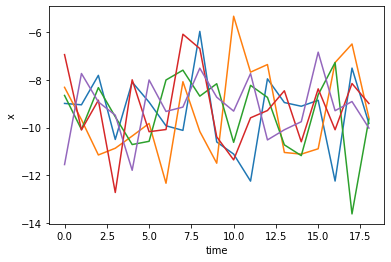

In [3]:
print(pos_a.shape, l_box.shape)

fig, ax = plt.subplots()
npc = 20
for i in range(5):
    dr = pos_a[1:,0,i*npc,1] - pos_a[:-1,0,i*npc,1]
    ydata = pos_a[0,0,0,1] + functions.fix_pbc3d_sign(dr,l_box[0][0])
    ax.plot(ydata)
ax.set_xlabel("time")
ax.set_ylabel("x")

fig.savefig("pos_t.png")

